# Perkenalan

Halo Kak Reviewer! Perkenalkan saya Rafka Imanda Putra dengan username dicoding rafka_imanda.

Dikesempatan kali ini saya akan mengirim submission pertama saya dalam Kelas Belajar Pengembangan Machine Learning.

Adapun dataset yang digunakan bersumber dari https://www.kaggle.com/kishanyadav/inshort-news dimana ini adalah dataset yang berisi mengenai 12.120 isi berita berdasar 7 label berbeda seperti technology,sports,politics,entertainment,world,automobile dan science.

Tujuan saya disini adalah membuat model yang mampu mengenali sebuah teks berita dan memprediksinya ke tujuh label target yang sesuai. Dan harapannya model yang saya buat bisa menyentuh akurasi 90% guna mendapatkan review 5 bintang dari reviewer.

Mungkin cukup sekian, mari kita mulai pemodelannya!

# Data Understanding

Context -
This data is collected by me on daily basis from inshorts news webapp.

Content -
This dataset have 3 columns named as news_headline, news_article, and news_category. It also contain news from 7 different categories like technology,sports,politics,entertainment,world,automobile and science.

Inspiration -
What types of machine learning models perform best on this dataset?
How multiclass classification works?

# Data Preparation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
%matplotlib inline

In [2]:
import io
from google.colab import files

import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Flatten, Dropout, Dense

In [4]:
files = files.upload()

Saving inshort_news_data-1.csv to inshort_news_data-1.csv
Saving inshort_news_data-2.csv to inshort_news_data-2.csv
Saving inshort_news_data-3.csv to inshort_news_data-3.csv
Saving inshort_news_data-4.csv to inshort_news_data-4.csv
Saving inshort_news_data-5.csv to inshort_news_data-5.csv
Saving inshort_news_data-6.csv to inshort_news_data-6.csv
Saving inshort_news_data-7.csv to inshort_news_data-7.csv


In [5]:
news1 = pd.read_csv(io.BytesIO(files['inshort_news_data-1.csv']))
news2 = pd.read_csv(io.BytesIO(files['inshort_news_data-2.csv']))
news3 = pd.read_csv(io.BytesIO(files['inshort_news_data-3.csv']))
news4 = pd.read_csv(io.BytesIO(files['inshort_news_data-4.csv']))
news5 = pd.read_csv(io.BytesIO(files['inshort_news_data-5.csv']))
news6 = pd.read_csv(io.BytesIO(files['inshort_news_data-6.csv']))
news7 = pd.read_csv(io.BytesIO(files['inshort_news_data-7.csv']))

In [6]:
data = [news1, news2, news3, news4, news5, news6, news7]

In [7]:
df = pd.concat(data, axis=0, ignore_index=True)

In [8]:
df.head()

,Unnamed: 0,news_headline,news_article,news_category
0,0,50-year-old problem of biology solved by Artif...,DeepMind's AI system 'AlphaFold' has been reco...,technology
1,1,Microsoft Teams to stop working on Internet Ex...,Microsoft Teams will stop working on Internet ...,technology
2,2,Hope US won't erect barriers to cooperation: C...,"China, in response to reports of US adding Chi...",technology
3,3,Global smartphone sales in Q3 falls 5.7% to 36...,The global smartphone sales in the third quart...,technology
4,4,EU hoping Biden will clarify US position on di...,The European Union (EU) is hoping that US Pres...,technology


In [9]:
df.shape

(12120, 4)

In [10]:
df = df.drop(['Unnamed: 0', 'news_headline'], axis=1)

In [11]:
df.head()

,news_article,news_category
0,DeepMind's AI system 'AlphaFold' has been reco...,technology
1,Microsoft Teams will stop working on Internet ...,technology
2,"China, in response to reports of US adding Chi...",technology
3,The global smartphone sales in the third quart...,technology
4,The European Union (EU) is hoping that US Pres...,technology


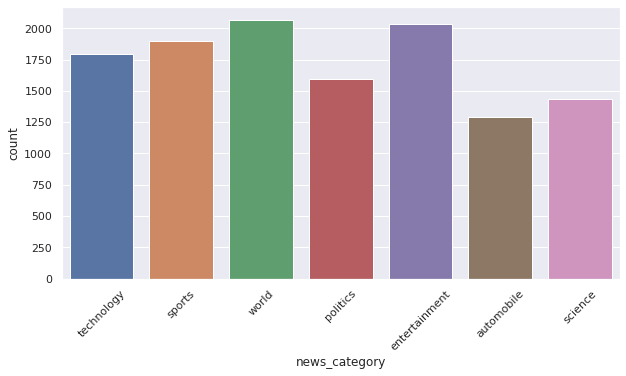

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(df['news_category'])
plt.xticks(rotation=45)
plt.show()

In [13]:
review = pd.get_dummies(df['news_category'])
df2 = pd.concat([df, review], axis=1)
df2 = df2.drop('news_category', axis=1)
df2.head()

,news_article,automobile,entertainment,politics,science,sports,technology,world
0,DeepMind's AI system 'AlphaFold' has been reco...,0,0,0,0,0,1,0
1,Microsoft Teams will stop working on Internet ...,0,0,0,0,0,1,0
2,"China, in response to reports of US adding Chi...",0,0,0,0,0,1,0
3,The global smartphone sales in the third quart...,0,0,0,0,0,1,0
4,The European Union (EU) is hoping that US Pres...,0,0,0,0,0,1,0


# Splitting, Tokenizing, Padding

In [14]:
X = df2['news_article'].values
y = df2.drop('news_article', axis=1).values

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
tokenizer = Tokenizer(num_words=10000, oov_token='n')

In [17]:
tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_test)

In [18]:
sequence_train = tokenizer.texts_to_sequences(X_train)
sequence_test = tokenizer.texts_to_sequences(X_test)

In [19]:
padded_train = pad_sequences(sequence_train)
padded_test = pad_sequences(sequence_test)

# Modelling

In [20]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy') > 0.92):
      print('\nYeay, akurasi memenuhi target!')
      self.model.stop_training = True

callbacks = myCallback()

In [21]:
model = Sequential([
                    Embedding(input_dim=10000, output_dim=128),
                    LSTM(128),
                    Flatten(),
                    Dropout(0.5),
                    Dense(128, activation='relu'),
                    Dense(64, activation='relu'),
                    Dense(7, activation='softmax')
])

In [22]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
history = model.fit(padded_train, y_train, epochs=25, validation_data=(padded_test, y_test), callbacks=[callbacks], batch_size=256)

Epoch 1/25
38/38 [==============================] - 21s 504ms/step - loss: 1.7782 - accuracy: 0.2433 - val_loss: 1.3989 - val_accuracy: 0.4361
Epoch 2/25
38/38 [==============================] - 19s 489ms/step - loss: 1.0458 - accuracy: 0.5644 - val_loss: 0.7588 - val_accuracy: 0.7265
Epoch 3/25
38/38 [==============================] - 18s 487ms/step - loss: 0.4759 - accuracy: 0.8445 - val_loss: 0.4598 - val_accuracy: 0.8725
Epoch 4/25
38/38 [==============================] - 18s 486ms/step - loss: 0.2416 - accuracy: 0.9317 - val_loss: 0.3400 - val_accuracy: 0.8977
Epoch 5/25
38/38 [==============================] - 18s 488ms/step - loss: 0.1682 - accuracy: 0.9519 - val_loss: 0.3255 - val_accuracy: 0.9080
Epoch 6/25
38/38 [==============================] - 19s 488ms/step - loss: 0.1436 - accuracy: 0.9537 - val_loss: 0.2831 - val_accuracy: 0.9187
Epoch 7/25
38/38 [==============================] - 18s 487ms/step - loss: 0.1217 - accuracy: 0.9611 - val_loss: 0.2949 - val_accuracy: 0.9179

* wow, cukup dengan 11 epoch, model sudah mampu mengenali kategori berita dengan akurasi validasi sekitar 92,2%.

# Plot Loss & Akurasi Pelatihan Model

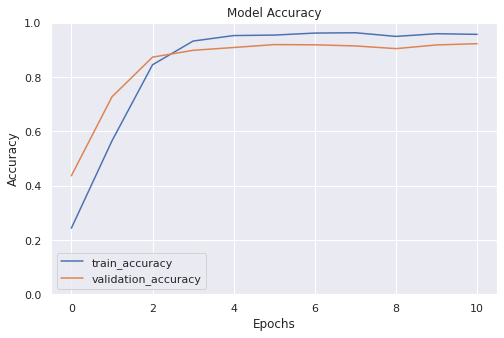

In [29]:
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='validation_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim(ymin=0, ymax=1)
plt.show()

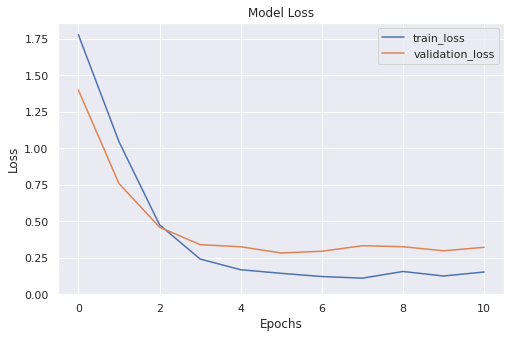

In [28]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='validation_loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.ylim(ymin=0)
plt.show()

# Conclusion


Akurasi dari model di atas 80%. -- Done

Mengimplementasikan callback. -- Done

Membuat plot loss dan akurasi pada saat training dan validation. -- Done

Dataset memiliki 3 kelas atau lebih dan minimal 2000 sampel data. -- Done

Akurasi pada training set dan validation set di atas 90%. -- Done